# visualisasi dataset LDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.set()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/data_fix.csv')

In [ ]:
df.head()

,topik,Answer,Year,Answer_fix
0,adhd,alo selamat siang dari penjelasan anda anda me...,2024,"['susah', 'fokus', 'susah', 'fokus', 'tanda', ..."
1,adhd,alo terimakasih atas pertanyaannya adhd sering...,2024,"['adhd', 'gejala', 'kisar', 'usia', 'gejala', ..."
2,adhd,alo terimakasih atas pertanyaannya sering mera...,2024,"['cemas', 'gugup', 'tegang', 'sulit', 'konsent..."
3,adhd,alo terimakasih atas pertanyaannya mudah gelis...,2024,"['mudah', 'gelisah', 'sulit', 'fokus', 'tanda'..."
4,adhd,alo terimakasih atas pertanyaannya adhd attent...,2024,"['adhd', 'attention', 'deficit', 'hyperactivit..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topik       15321 non-null  object
 1   Answer      15321 non-null  object
 2   Year        15321 non-null  int64 
 3   Answer_fix  15321 non-null  object
dtypes: int64(1), object(3)
memory usage: 478.9+ KB


In [ ]:
df.topik.value_counts()

topik
psikologi                     3986
kesehatan mental              2159
depresi                       1885
stres                         1628
gangguan kecemasan umum       1262
gangguan mental                749
gangguan kepribadian           664
bipolar                        560
serangan panik                 530
ptsd                           478
skizofrenia                    333
gangguan kecemasan sosial      138
ocd                            122
sakit jiwa                     118
pemeriksaan medis kejiwaan     111
gangguan panik                 107
adhd                           104
percobaan bunuh diri           101
psikosis                        69
bunuh diri                      59
skizofrenia paranoid            31
postpartum depression           30
trikotilomania                  29
terapi perilaku kognitif        19
gangguan tidur berjalan         15
agoraphobia                     14
paranoid                        12
halusinasi                       6
gangguan jiwa 

## Visualisasi

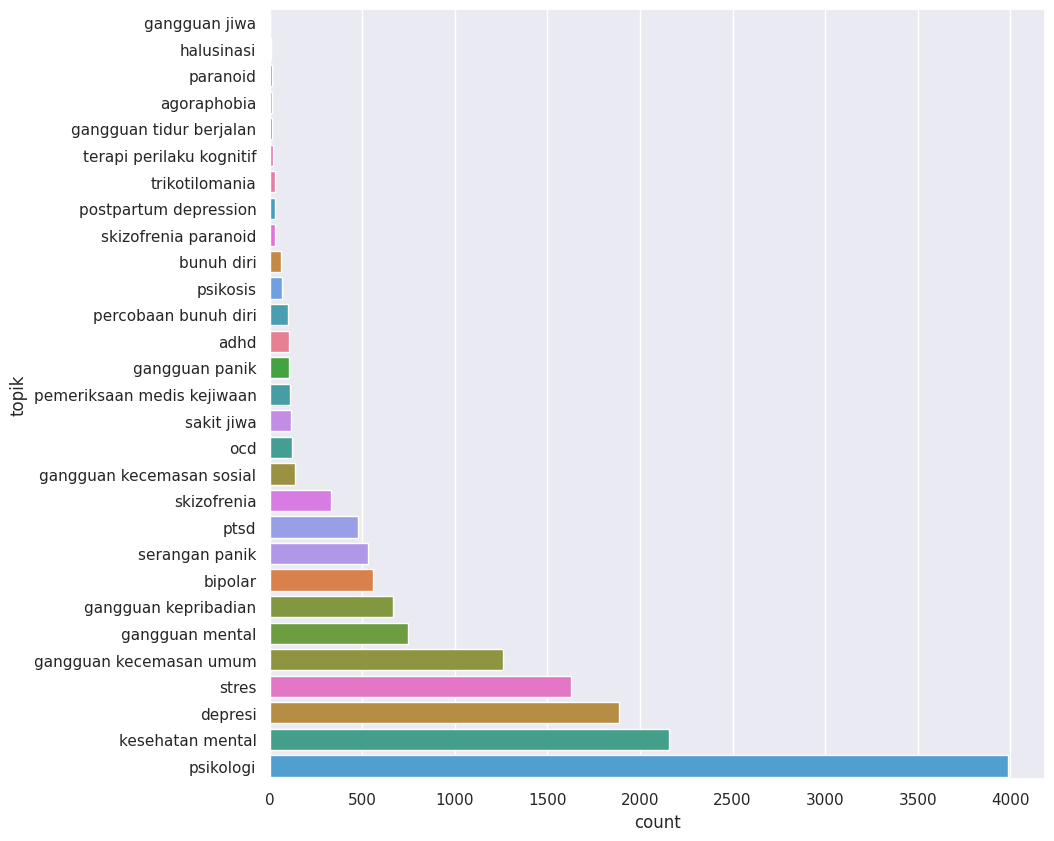

In [ ]:
# order article counts per topik and get the index
order = df.topik.value_counts(ascending=True).index

plt.figure(figsize=(10,10))
sns.countplot(y='topik', data=df, orient='h', order=order, hue='topik', legend=False);

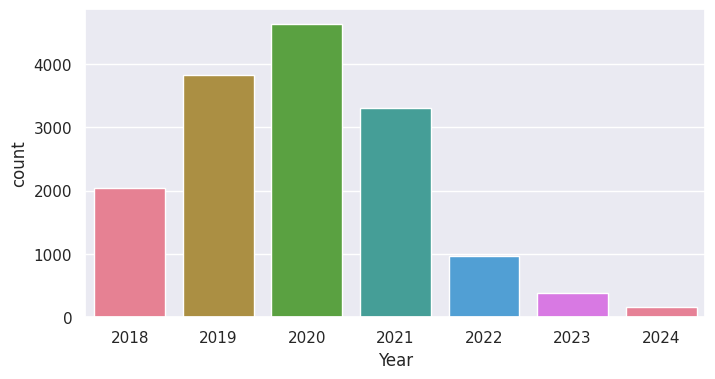

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=df, hue='Year', palette='husl', legend=False);

In [ ]:
pd.crosstab(df.topik, df.Year)

Year,2018,2019,2020,2021,2022,2023,2024
topik,,,,,,,
adhd,19,25,18,20,9,6,7
agoraphobia,0,3,4,6,1,0,0
bipolar,104,148,212,65,17,10,4
bunuh diri,3,16,28,9,0,1,2
depresi,344,530,643,296,50,15,7
gangguan jiwa,1,0,0,0,1,0,0
gangguan kecemasan sosial,0,11,69,49,5,3,1
gangguan kecemasan umum,121,293,515,225,61,38,9
gangguan kepribadian,94,156,257,119,29,5,4


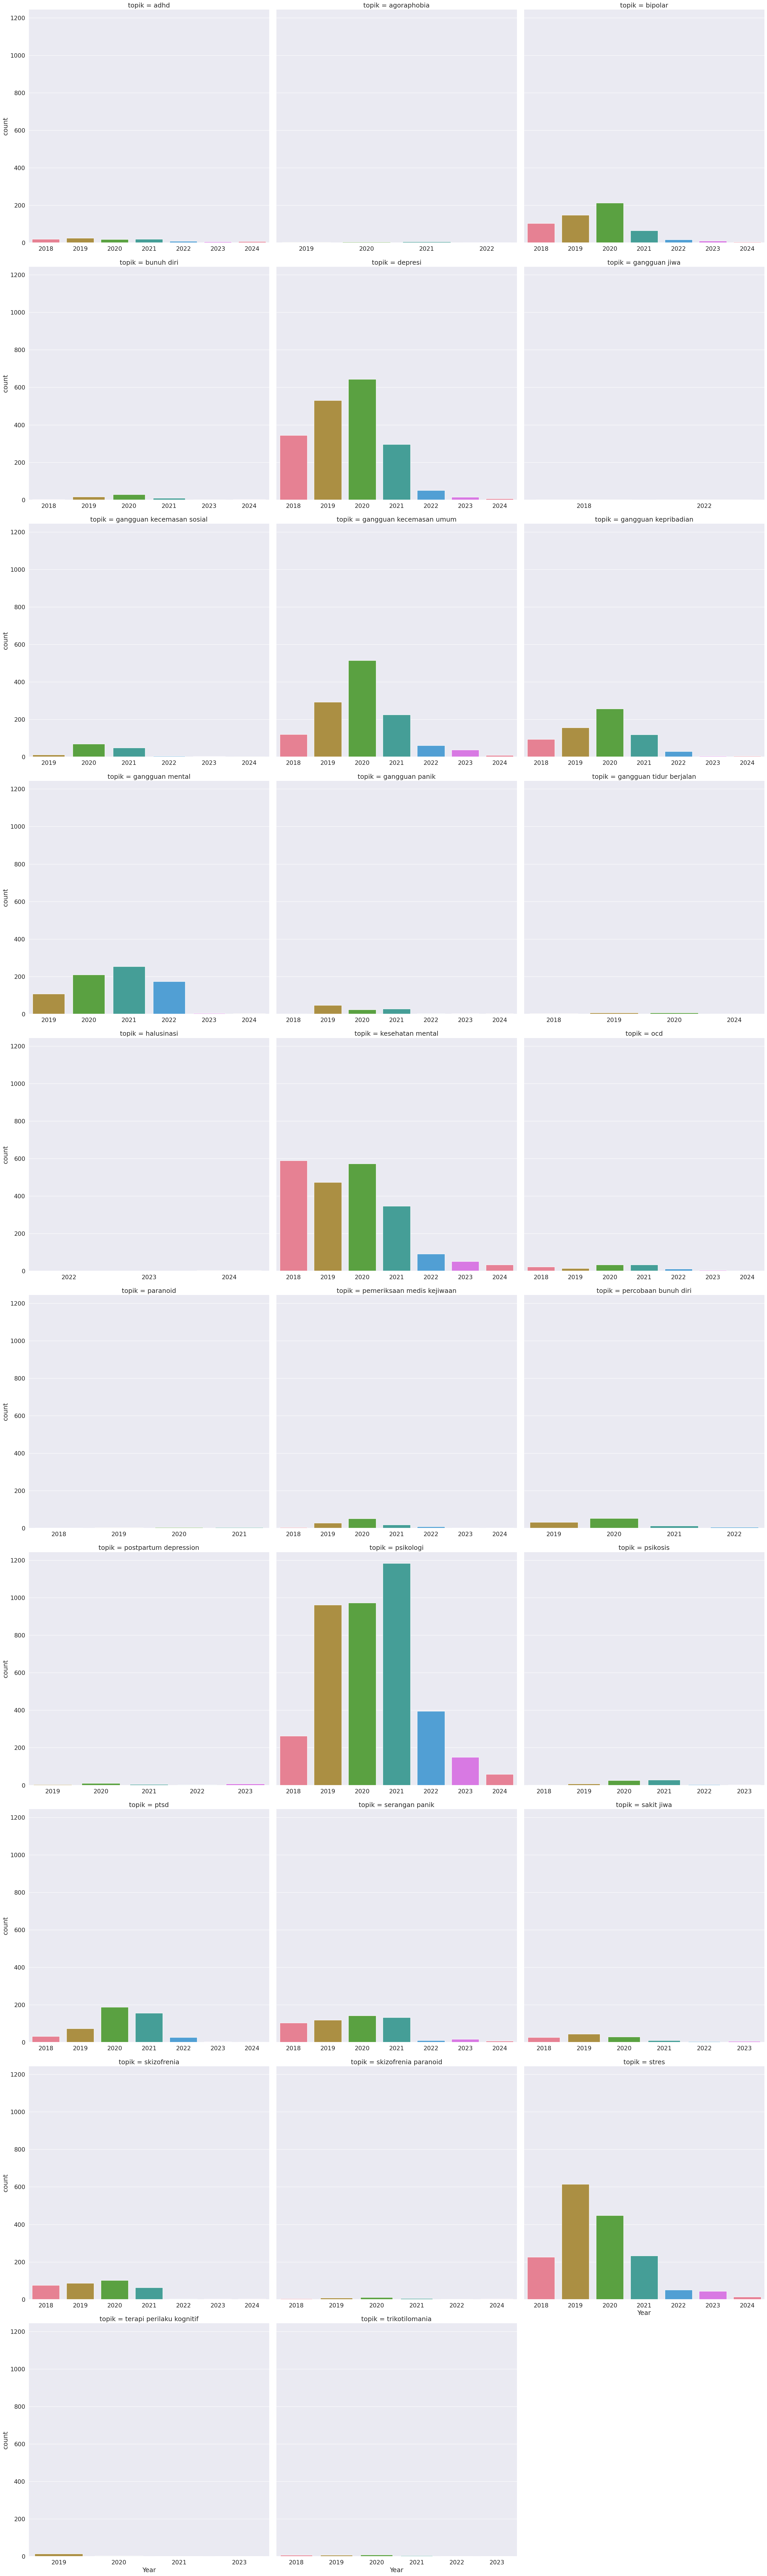

In [ ]:
sns.set(font_scale=1.5)
sns.catplot(data=df, x='Year', col="topik", col_wrap=3, sharex=False, height=10, kind='count', hue='Year', palette='husl', legend=False);

### Word Cloud

In [ ]:
# Pastikan kolom 'Answer_fix' berisi list token
df['Answer_fix'] = df['Answer_fix'].apply(eval)

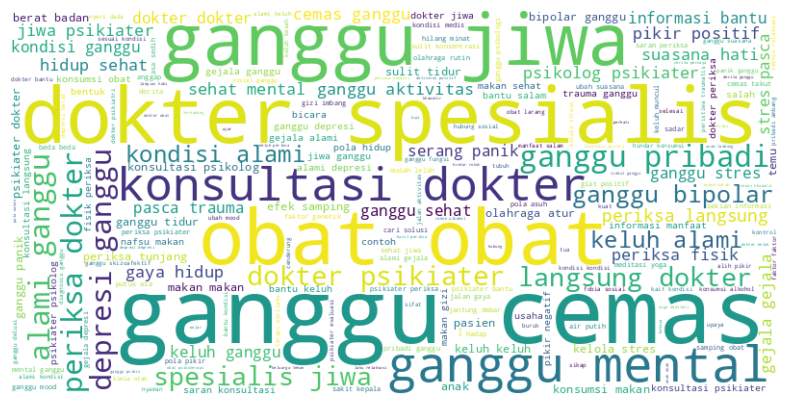

In [ ]:
# Menggabungkan semua kata-kata dalam kolom Answer_fix menjadi satu string
all_words = ' '.join([' '.join(words) for words in df['Answer_fix']])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan WordCloud
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
# Menghitung frekuensi kata-kata dalam kolom 'Answer_fix'
word_freq = Counter()
for tokens in df['Answer_fix']:
    word_freq.update(tokens)

# Konversi hasil Counter ke DataFrame untuk ditampilkan
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Kata', 'Frekuensi'])

# Menampilkan hasil berdasarkan frekuensi tertinggi
word_freq_df.sort_values(by='Frekuensi', ascending=False, inplace=True)
word_freq_df

,Kata,Frekuensi
7,ganggu,57049
40,kondisi,28632
3,alami,26042
41,dokter,26030
100,keluh,22173
...,...,...
2020,ambing,3
5145,plasma,3
2019,terombang,3
4178,ataksia,3


# Evaluasi Coherence tiap teknik ekstraksi fitur

In [ ]:
import pickle

### part 1

In [ ]:
# Menentukan path
path = '/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/pickle data/'

In [ ]:
with open(f'{path}coherence_values1.pkl', 'rb') as f:
    coherence_bow = pickle.load(f)

with open(f'{path}coherence_values2.pkl', 'rb') as f:
    coherence_tfidf = pickle.load(f)

with open(f'{path}coherence_values3.pkl', 'rb') as f:
    coherence_bigram_phrase = pickle.load(f)

with open(f'{path}coherence_values3_00.pkl', 'rb') as f:
    coherence_bigram_nltk = pickle.load(f)

In [ ]:
import pandas as pd

# Daftar jumlah topik
num_topics = list(range(2, 50))  # Dari 2 hingga 49

# Membuat DataFrame
df = pd.DataFrame({
    'Jumlah Topik': num_topics,
    'BOW': coherence_bow,
    'TF-IDF': coherence_tfidf,
    'Bigram Phrase': coherence_bigram_phrase,
    'Bigram NLTK': coherence_bigram_nltk
})

# Menampilkan DataFrame
df

,Jumlah Topik,BOW,TF-IDF,Bigram Phrase,Bigram NLTK
0,2,0.379758,0.422079,0.323991,0.356965
1,3,0.382956,0.514172,0.365450,0.399251
2,4,0.410649,0.474499,0.390704,0.452619
3,5,0.396391,0.504994,0.384531,0.389798
4,6,0.362959,0.499659,0.383868,0.466004
5,7,0.432151,0.502407,0.381379,0.391963
6,8,0.372560,0.479141,0.373741,0.459174
7,9,0.434397,0.425332,0.386703,0.412144
8,10,0.356991,0.459621,0.411839,0.408299
9,11,0.419990,0.418310,0.370310,0.351748


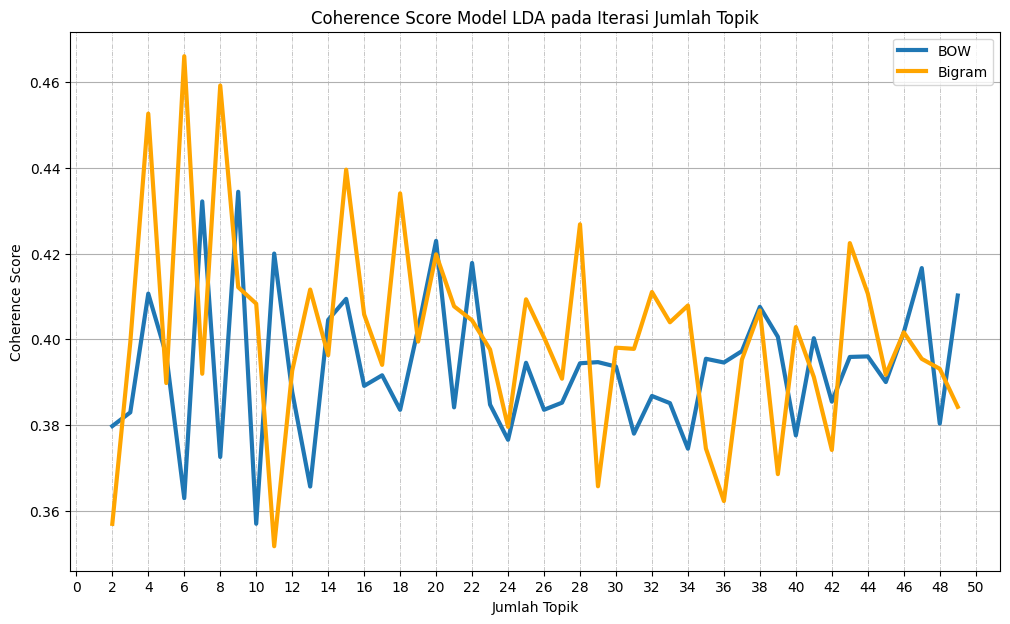

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik
plt.figure(figsize=(12, 7))

# Plot untuk setiap metode
plt.plot(df['Jumlah Topik'], df['BOW'], label='BOW', linestyle='-', linewidth=3)
# plt.plot(df['Jumlah Topik'], df['TF-IDF'], label='TF-IDF', linestyle=':')
# plt.plot(df['Jumlah Topik'], df['Bigram Phrase'], label='Bigram Phrase', linestyle='-.')
plt.plot(df['Jumlah Topik'], df['Bigram NLTK'], label='Bigram', linestyle='-', linewidth=3, color='orange')

# menambahkan garis background
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)

# Menyesuaikan interval grid pada sumbu x
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

# Menambahkan label dan judul
plt.xlabel('Jumlah Topik')
plt.ylabel('Coherence Score')
plt.title('Coherence Score Model LDA pada Iterasi Jumlah Topik')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

### part 2

In [ ]:
import pickle

In [ ]:
# Menentukan path
path = '/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/LDA_tambah jumlah topik/pickle data/'

In [ ]:
with open(f'{path}coherence_values1.pkl', 'rb') as f:
    coherence_bow = pickle.load(f)

with open(f'{path}coherence_values3_00.pkl', 'rb') as f:
    coherence_bigram = pickle.load(f)

In [ ]:
import pandas as pd

# Daftar jumlah topik
num_topics = list(range(5, 51, 5))

# Membuat DataFrame
df = pd.DataFrame({
    'Jumlah Topik': num_topics,
    'BOW': coherence_bow,
    'Bigram': coherence_bigram
})

# Menampilkan DataFrame
df

,Jumlah Topik,BOW,Bigram
0,5,0.421838,0.454487
1,10,0.413447,0.420070
2,15,0.408632,0.519966
3,20,0.429680,0.474101
4,25,0.422973,0.450491
5,30,0.417064,0.466874
6,35,0.422861,0.472808
7,40,0.427379,0.446811
8,45,0.414542,0.463774
9,50,0.407691,0.454895


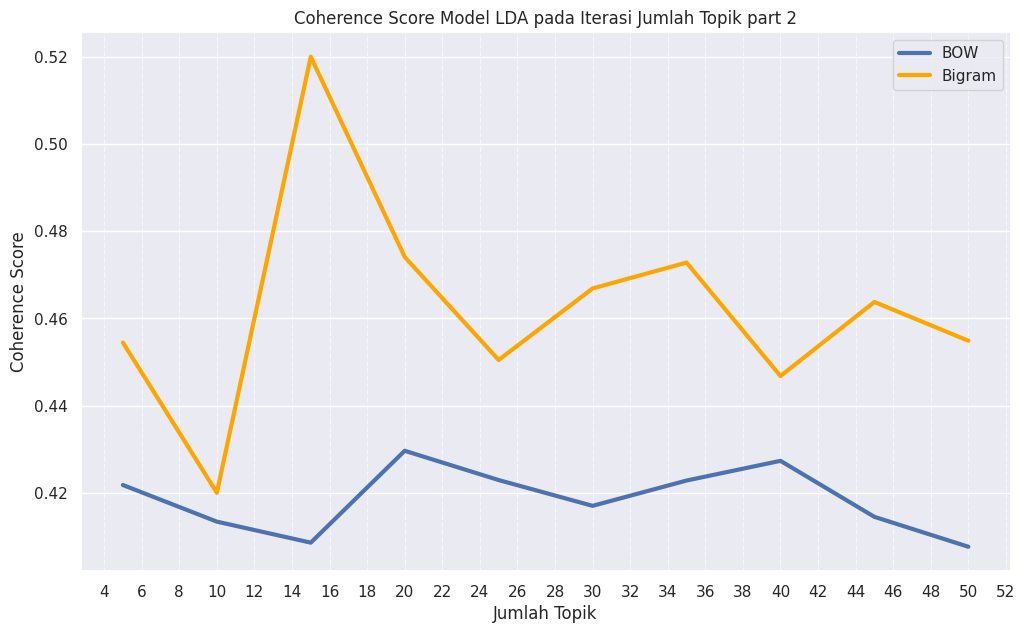

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik
plt.figure(figsize=(12, 7))

# Plot untuk setiap metode
plt.plot(df['Jumlah Topik'], df['BOW'], label='BOW', linestyle='-', linewidth=3)
plt.plot(df['Jumlah Topik'], df['Bigram'], label='Bigram', linestyle='-', linewidth=3, color='orange')

# menambahkan garis background
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)

# Menyesuaikan interval grid pada sumbu x
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

# Menambahkan label dan judul
plt.xlabel('Jumlah Topik')
plt.ylabel('Coherence Score')
plt.title('Coherence Score Model LDA pada Iterasi Jumlah Topik part 2')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

# Visualisasi dataset Klasifikasi dengan 3 Label topik pilihan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.set()

In [ ]:
import pandas as pd

# Definisikan path untuk menyimpan file
path = '/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/Eksperimen - Klasifikasi Teks/'

df2 = pd.read_csv(path + 'datamodel_klasifikasi_clean.csv')

In [ ]:
df2.head()

,Answer,Year,Answer_fix,topik
0,Alo Anjali Terimakasih atas pertanyaannya Inso...,2019,"['insomnia', 'sakit', 'gejala', 'sakit', 'saki...",depresi
1,Selamat malam terima kasih telah bertanya di A...,2020,"['asa', 'debar', 'debar', 'irama', 'jantung', ...",stres
2,Alo Kak terima kasih telah bertanya pada Alodo...,2020,"['paham', 'asa', 'anak', 'tua', 'cerai', 'muda...",depresi
3,Selamat pagi Maria terima kasih telah bertanya...,2018,"['maria', 'prihatin', 'kondisi', 'alami', 'pen...",depresi
4,Alo Fitri Nurasiah Depresi merupakan suatu ben...,2020,"['depresi', 'bentuk', 'mental', 'perhati', 'ma...",depresi


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Answer      3735 non-null   object
 1   Year        3735 non-null   int64 
 2   Answer_fix  3735 non-null   object
 3   topik       3735 non-null   object
dtypes: int64(1), object(3)
memory usage: 116.8+ KB


In [ ]:
df2.topik.value_counts()

,count
topik,
depresi,1456
stres,1323
cemas,956


## Visualisasi

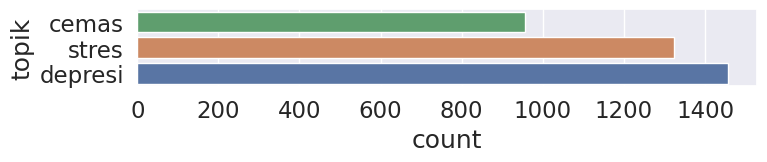

In [ ]:
# order article counts per topik and get the index
order = df2.topik.value_counts(ascending=True).index

plt.figure(figsize=(8,1))
sns.countplot(y='topik', data=df2, orient='h', order=order, hue='topik', legend=False);

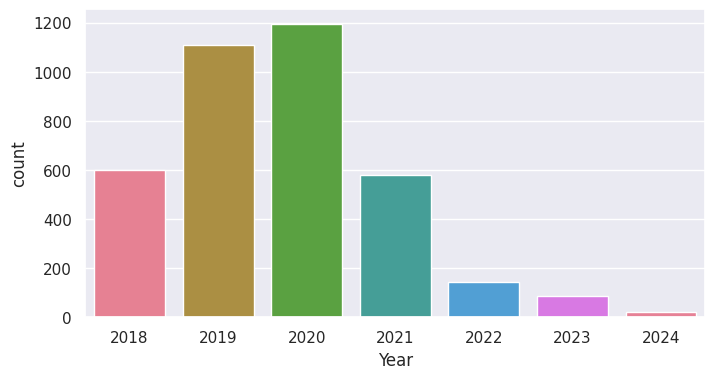

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=df2, hue='Year', palette='husl', legend=False);

In [ ]:
pd.crosstab(df2.topik, df2.Year)

Year,2018,2019,2020,2021,2022,2023,2024
topik,,,,,,,
cemas,103,196,389,168,59,33,8
depresi,302,401,468,228,39,14,4
stres,195,511,338,185,44,39,11


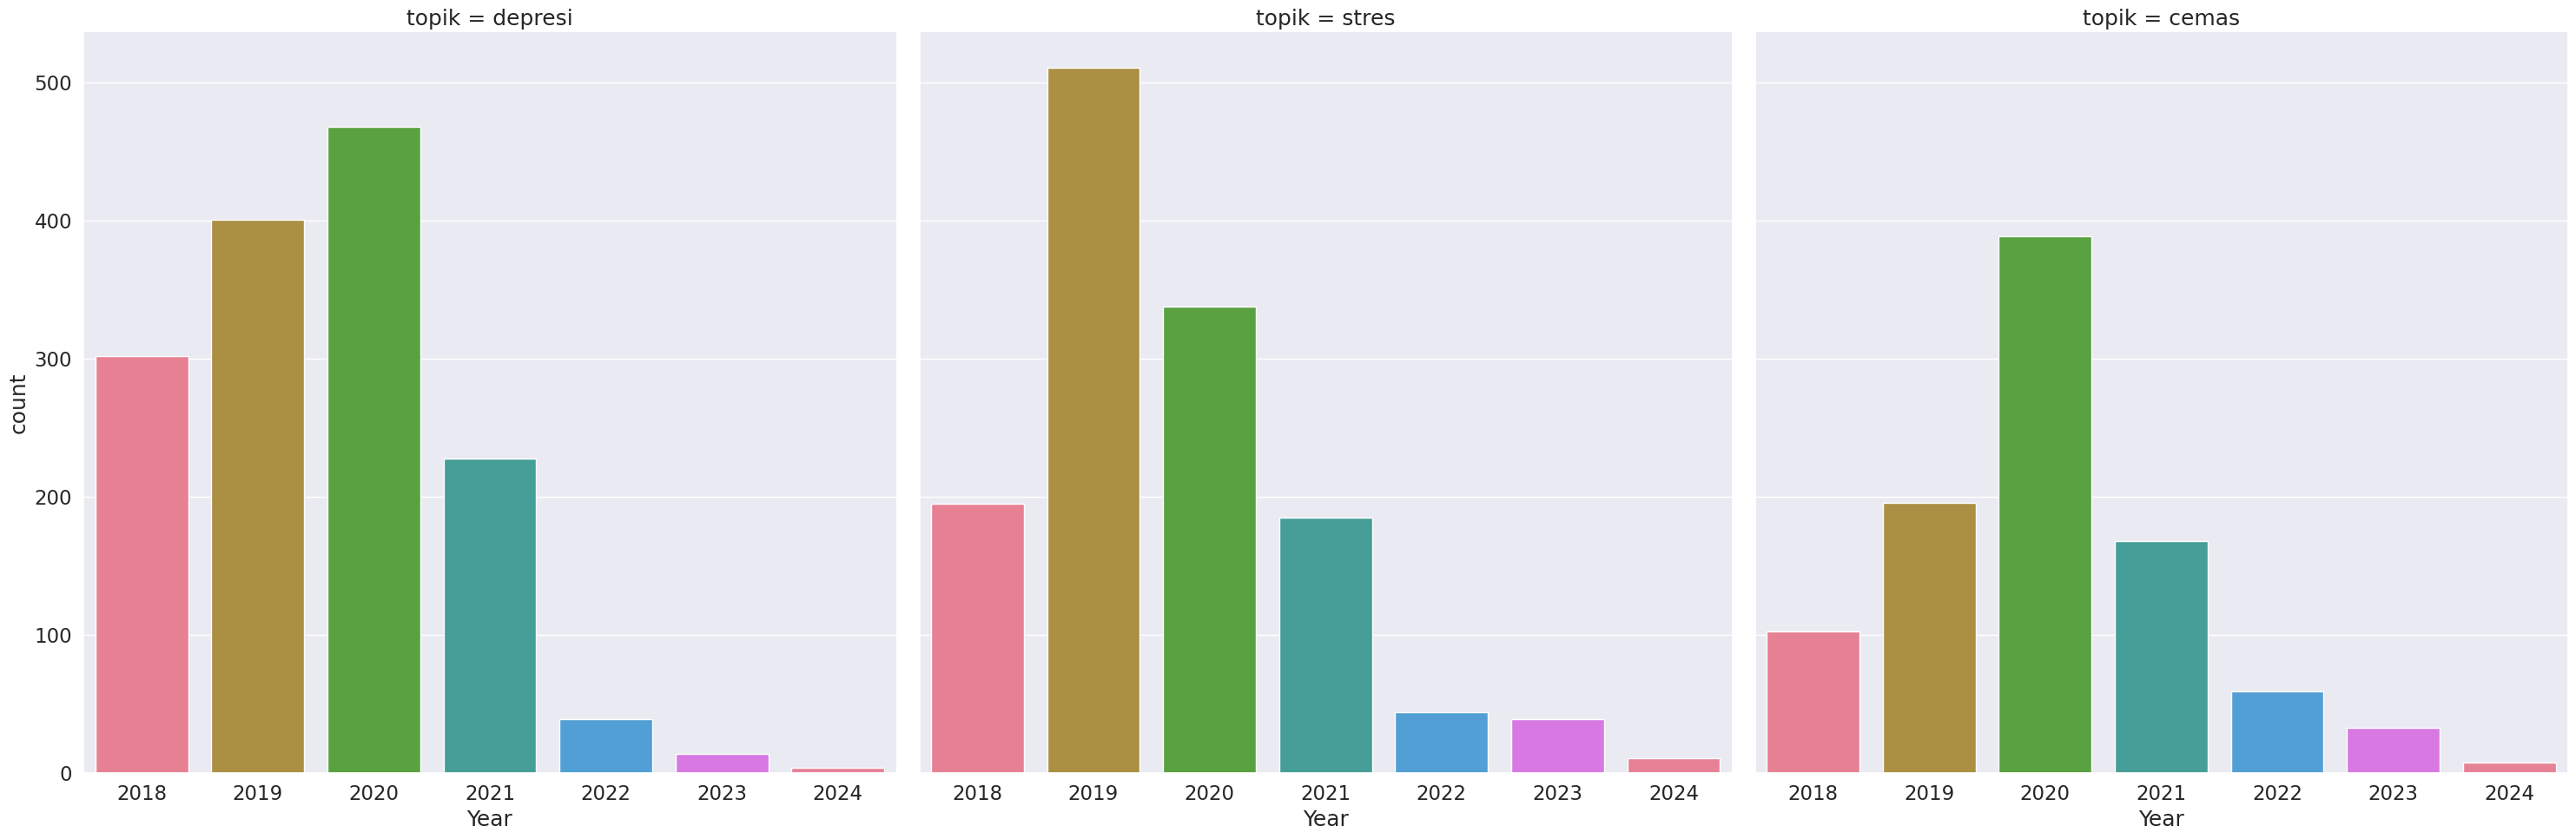

In [ ]:
sns.set(font_scale=1.5)
sns.catplot(data=df2, x='Year', col="topik", col_wrap=3, sharex=False, height=10, kind='count', hue='Year', palette='husl', legend=False);

### Word Cloud

In [ ]:
# Pastikan kolom 'Answer_fix' berisi list token
df2['Answer_fix'] = df2['Answer_fix'].apply(eval)

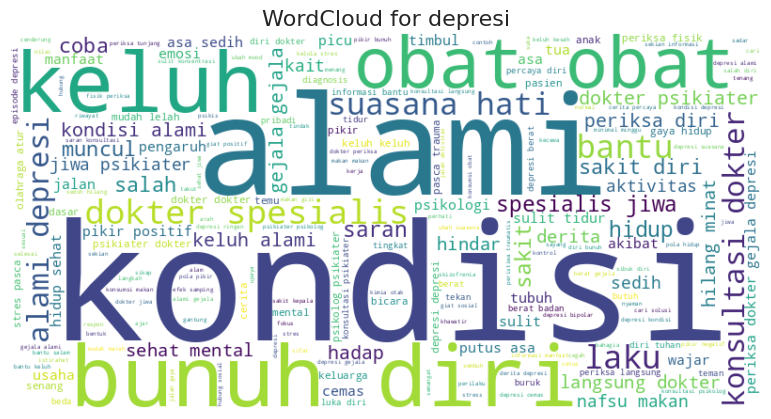

----------------------------------------------------------------------------------------------------


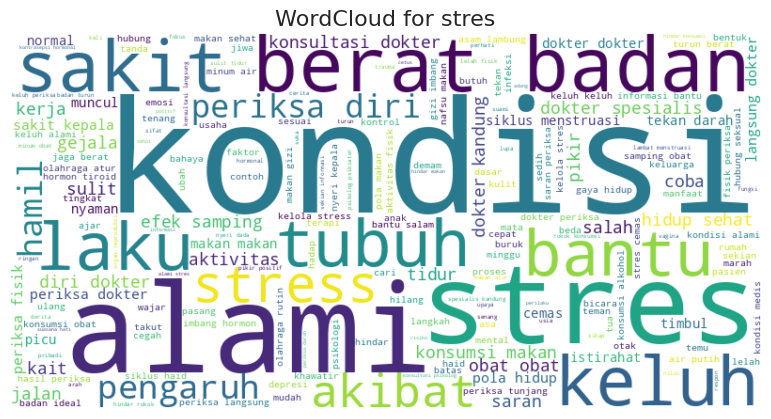

----------------------------------------------------------------------------------------------------


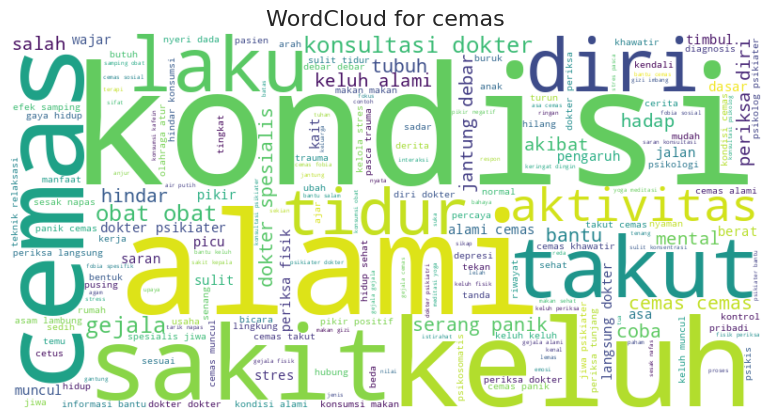

----------------------------------------------------------------------------------------------------


In [ ]:
# Mendapatkan daftar topik unik
topik_list = df2['topik'].unique()

# Membuat WordCloud untuk setiap topik
for topik in topik_list:
    # Menggabungkan semua kata-kata dalam kolom Answer_fix untuk topik yang spesifik
    words = ' '.join([' '.join(words) for words in df2[df2['topik'] == topik]['Answer_fix']])

    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    # Menampilkan WordCloud
    plt.figure(figsize=(12, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {topik}', fontsize=16)
    plt.axis('off')
    plt.tight_layout(pad=3.0)
    plt.show()
    print("-"*100)

In [ ]:
from collections import Counter
# Menghitung frekuensi kata-kata dalam kolom 'Answer_fix'
word_freq = Counter()
for tokens in df2['Answer_fix']:
    word_freq.update(tokens)

# Konversi hasil Counter ke DataFrame untuk ditampilkan
word_freq_df2 = pd.DataFrame(list(word_freq.items()), columns=['Kata', 'Frekuensi'])

# Menampilkan hasil berdasarkan frekuensi tertinggi
word_freq_df2.sort_values(by='Frekuensi', ascending=False, inplace=True)
word_freq_df2

,Kata,Frekuensi
37,dokter,7138
89,kondisi,6850
26,diri,6400
6,alami,6253
24,keluh,6081
...,...,...
3264,semen,1
1067,jaman,1
3274,argumen,1
2762,notifikasi,1
